In [1]:
# Uncomment the following line if you do not have the Python module 'librosa' installed
# !pip install librosa

import os
import numpy as np
import pandas as pd
import librosa

# Function to create MFCC coefficients given an audio file

def create_MFCC_coefficients(file_name):

    sr_value = 44100
    n_mfcc_count = 20
    
    try:
        # Load the audio file using librosa
        y, sr = librosa.load(file_name, sr=sr_value)
              
        # Compute MFCC coefficients for the segment
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc_count)
        #print(f"file_name: {file_name}: y={len(y)}, sr={sr}, mfccs matrix:{np.shape(mfccs)}")
        
        # Create and return MFCC dataframe
        coeff_df = pd.DataFrame(mfccs)
        
        return coeff_df

    except Exception as e:
       print(f"Error creating MFCC coefficients: {file_name}:{str(e)}")

In [2]:

# Function to resample MFCC to 2500 columns
def resample_mfcc_to_fixed_columns(mfcc_matrix, target_columns=2500):
    original_columns = mfcc_matrix.shape[1]
    window_size = original_columns // target_columns

    if window_size > 1:
        resampled_mfcc = np.apply_along_axis(
            lambda m: np.convolve(m, np.ones(window_size)/window_size, mode='valid')[::window_size],
            axis=1,
            arr=mfcc_matrix
        )
    else:
        resampled_mfcc = mfcc_matrix[:, :target_columns]

    if resampled_mfcc.shape[1] > target_columns:
        resampled_mfcc = resampled_mfcc[:, :target_columns]
    elif resampled_mfcc.shape[1] < target_columns:
        padding = target_columns - resampled_mfcc.shape[1]
        resampled_mfcc = np.pad(resampled_mfcc, ((0, 0), (0, padding)), mode='constant')

    return resampled_mfcc


In [3]:

# List to store the 0th row of each MFCC
nationalanthem_0th_rows = []
audio_folder = r'C:\Users\91751\OneDrive - Indian Institute of Technology Bombay\Desktop\DS 203 assignemnts\Project\songs\1'
# Process each audio file in the folder
for file_name in os.listdir(audio_folder):
    if file_name.endswith('.mp3'):  # Process only mp3 files
        file_path = os.path.join(audio_folder, file_name)
        
        # Generate MFCC
        mfcc_df = create_MFCC_coefficients(file_path)
        if mfcc_df is not None:
            mfcc_matrix = mfcc_df.values
            
            # Resample MFCC to 2500 columns
            resampled_mfcc = resample_mfcc_to_fixed_columns(mfcc_matrix)
            
            # Extract 0th row and add to list
            nationalanthem_0th_rows.append(resampled_mfcc[0, :])

# Create DataFrame for national anthem training set
nationalanthem_trainset = pd.DataFrame(nationalanthem_0th_rows)
print("Shape of nationalanthem_trainset:", nationalanthem_trainset.shape)

Shape of nationalanthem_trainset: (7, 2500)


In [4]:
nationalanthem_trainset.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,-544.486023,-544.486023,-275.261068,-199.987645,-268.933100,-314.497467,-338.572021,-332.393483,-329.187988,-344.731618,...,-544.486023,-544.378784,-544.484517,-544.381104,-544.465393,-544.486023,-544.486023,-544.486023,-544.486023,-544.486023
1,-645.751343,-645.751343,-564.916885,-343.713852,-275.877975,-275.884247,-279.132431,-273.732758,-277.220413,-274.264832,...,-348.890030,-354.307144,-364.770859,-359.874680,-354.172165,-345.758789,-325.809708,-313.565399,-304.507202,-311.971893
2,-516.703064,-516.703064,-516.703064,-516.703064,-516.703064,-516.703064,-516.703064,-516.703064,-516.703064,-516.703064,...,-114.820516,-118.219363,-125.679911,-123.016543,-123.283600,-125.373108,-118.956467,-120.747007,-117.827454,-118.620145
3,-511.675446,-402.055199,-148.863934,-158.255737,-158.038101,-147.680866,-153.871647,-140.917599,-118.537495,-123.288010,...,-207.337879,-206.186386,-198.283146,-193.989140,-193.638187,-194.220005,-197.209034,-202.116592,-201.797653,-199.634346
4,-595.030762,-595.030762,-595.030762,-595.030762,-593.005707,-585.080658,-561.077454,-532.493988,-505.703629,-475.494797,...,-89.498894,-93.126259,-96.948128,-102.052837,-100.752522,-102.622501,-109.920311,-113.624523,-105.232689,-107.783047


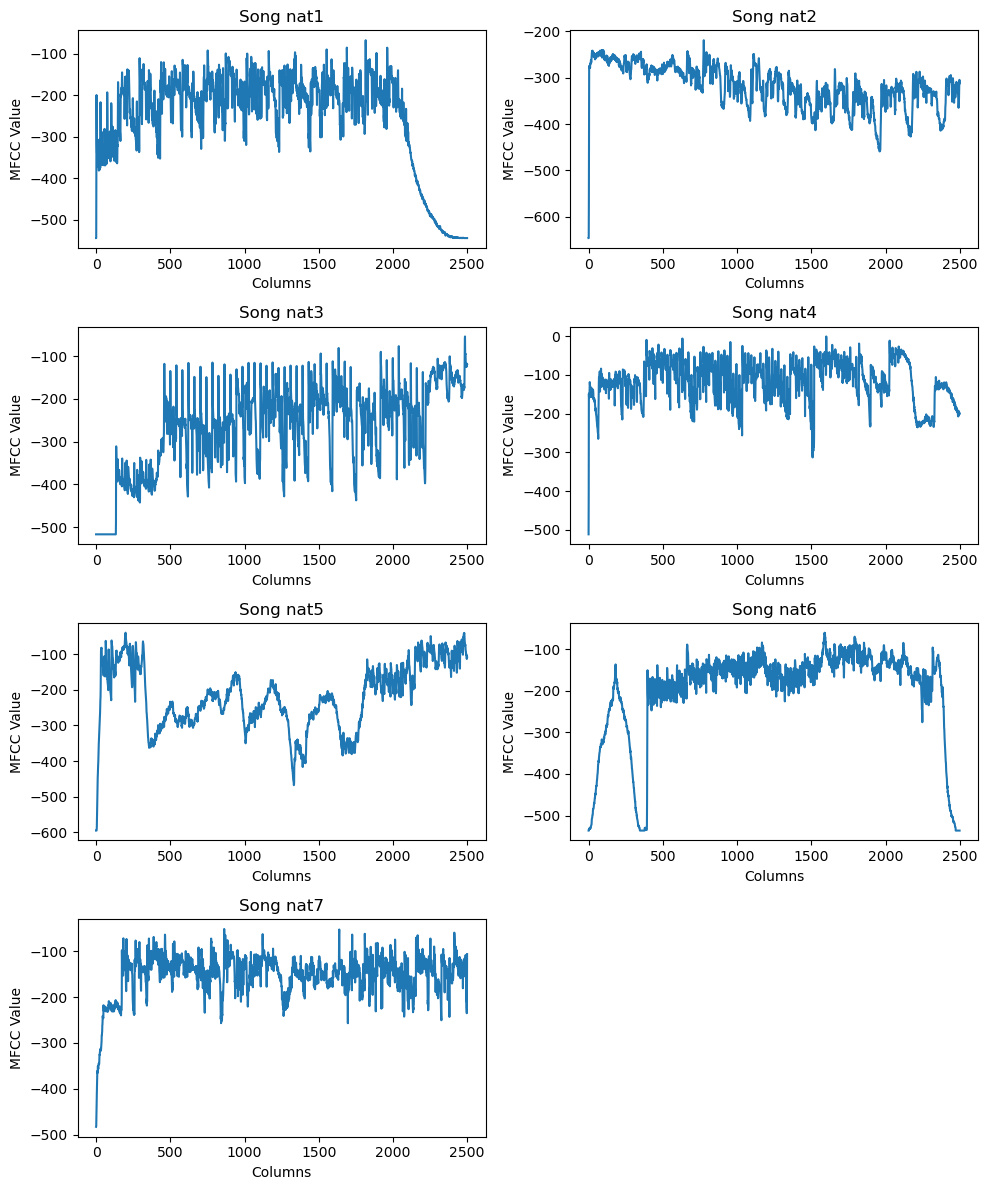

In [ ]:
import matplotlib.pyplot as plt

# Number of rows and columns for the subplot grid
num_plots = nationalanthem_trainset.shape[0]
num_columns = 2
num_rows = (num_plots + 1) // num_columns  # Calculate the number of rows needed

# Set up the figure size
plt.figure(figsize=(10, num_rows * 3))  # Adjust figure size as needed

# Plot each row in the DataFrame
for i in range(num_plots):
    plt.subplot(num_rows, num_columns, i + 1)
    plt.plot(nationalanthem_trainset.iloc[i, :])
    plt.title(f"Song nat{i+1}")
    plt.xlabel("Columns")
    plt.ylabel("MFCC Value")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [9]:
import random

def monty_hall_variant_simulation(num_trials):
    num_doors = 5
    switch_wins = 0
    stay_wins = 0

    for _ in range(num_trials):
        all_doors = list(range(num_doors))
        
        # Randomly place the car and the key behind two different doors
        car, key = random.sample(all_doors, 2)
        
        # Player initially picks two doors
        player_choice = random.sample(all_doors, 2)
        
        # Check if the player’s initial choice includes both the car and the key
        if car in player_choice and key in player_choice:
            stay_wins += 1  # The player wins by staying if both car and key are in the chosen doors
        else:
            # Host reveals an empty door that is not chosen by the player
            host_options = [door for door in all_doors if door not in player_choice and door != car and door != key]
            doors_revealed_by_host = random.choice(host_options)
            
            # Player decides to switch
            switch_options = [door for door in all_doors if door not in player_choice and door != doors_revealed_by_host]
            
            # Check if switching results in a win (i.e., both car and key are now in switch_options)
            if car in switch_options and key in switch_options:
                switch_wins += 1

    return switch_wins / num_trials, stay_wins / num_trials

# Run the simulation with a specified number of trials
num_trials = 100000
switch_win_probability, stay_win_probability = monty_hall_variant_simulation(num_trials)

print(f"Probability of winning when player switches: {switch_win_probability}")
print(f"Probability of winning when player stays   : {stay_win_probability}")


Probability of winning when player switches: 0.29801
Probability of winning when player stays   : 0.09967
